In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
from ctadiv import *

## Select the CTA location and time of observation

In [3]:
time='2020-02-08T04:00'
div=0.0022
name='polaris'

In [4]:
cta = CTA_Info('north',time)
cta.altaz

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.1607829, -1718.7370058, 3051.71504125) km
Observation time :  2020-02-08T04:00:00.000


<AltAz Frame (obstime=2020-02-08T04:00:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [5]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS

## Set source location

In [6]:
from astropy.coordinates import get_icrs_coordinates
star = get_icrs_coordinates(name)
star

<SkyCoord (ICRS): (ra, dec) in deg
    (37.95456067, 89.26410897)>

In [7]:
print ("source:", cta.source)
cta.set_source_loc(ra=star.ra, dec=star.dec)
print ("source:", cta.source)
if cta.source.alt<=24*u.deg:
    print('\n\tWARNING: you source is not visible')

source: None
source: <SkyCoord (AltAz: obstime=2020-02-08T04:00:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.48619534, 28.29658503)>


## Get locations (sun, moon, source)

## Plot the naviation plot (Sun, Moon, and a source)

<IPython.core.display.Javascript object>


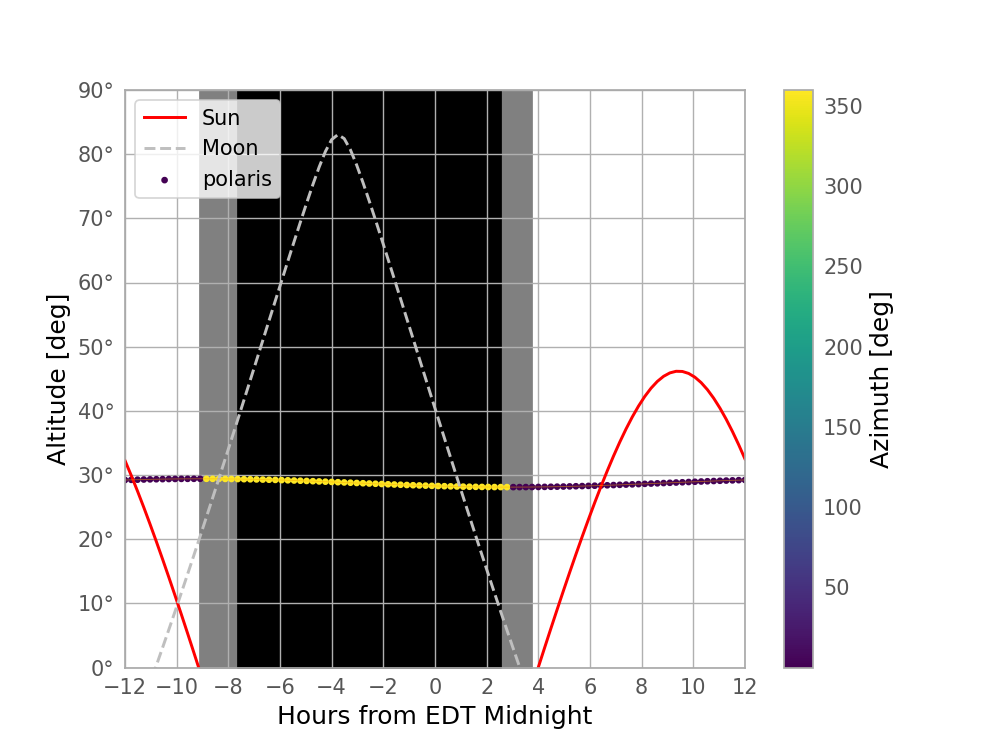

In [8]:
cta.navigation_plot(label = name)
plt.savefig(f'navigation_{name}_{time}.png')
#plt.show()

## Load array and pointing to a source

In [9]:
array =  LoadConfig("./config/prod5/layout_alpha_Prod5b_LaPalma_M6C8aj.txt", frame=cta, pointing2src=True)

#array.set_pointing_coord(star.ra, star.dec)
array.table.units='deg'
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-70.93,-52.07,43.0,359.486,28.297,61.703,28.000,2.150,14.536,0.880,0.008,0.474,77.80
2,-35.27,66.14,32.0,359.486,28.297,61.703,28.000,2.150,14.536,0.880,0.008,0.474,61.95
3,75.28,50.49,28.7,359.486,28.297,61.703,28.000,2.150,14.536,0.880,0.008,0.474,157.19
4,30.91,-64.54,32.0,359.486,28.297,61.703,28.000,2.150,14.536,0.880,0.008,0.474,141.22
5,-211.54,5.66,50.3,359.486,28.297,61.703,16.000,3.850,46.707,0.880,0.008,0.474,135.49
6,-153.26,169.01,24.0,359.486,28.297,61.703,16.000,3.850,46.707,0.880,0.008,0.474,163.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,-211.6,5.66,28.5,359.486,28.297,61.703,16.000,3.850,46.707,0.880,0.008,0.474,133.29


## Activate the divergent pointing mode

In [10]:
array.divergent_pointing(0) #0.01453   0.0043

In [11]:
array.hFoV(m_cut=0)

<Quantity 46.49149 deg2>

In [12]:
np.sqrt(array.hFoV(m_cut=0)/np.pi)

<Quantity 3.84690796 deg>

In [13]:
array.hFoV(m_cut=3,return_multiplicity=True)

(<Quantity 46.49149 deg2>, 21.494855793557083, 13.73454091781132)

<IPython.core.display.Javascript object>


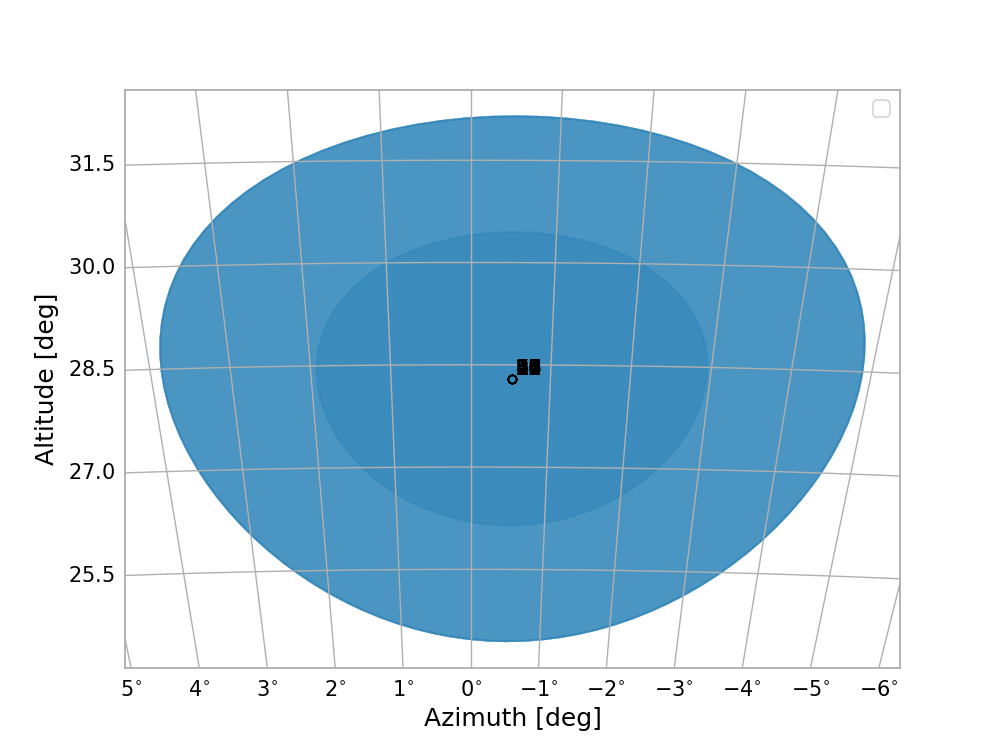

/home/irene/cta/Divergent-Pointing-my-version/ctadiv/ArrayConfig/visualization.py:248: MatplotlibDeprecationWarning: 
The ParasiteAxesAuxTransBase class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ParasiteAxesBase instead.
  ax2 = ParasiteAxesAuxTrans(ax1, tr, "equal")
No handles with labels found to put in legend.


In [14]:
array.skymap_polar()

In [15]:
array.pointing

{'az': <Quantity 359.48619534 deg>,
 'alt': <Quantity 28.29658503 deg>,
 'ra': <Quantity 37.95456067 deg>,
 'dec': <Quantity 89.26410897 deg>}

<IPython.core.display.Javascript object>


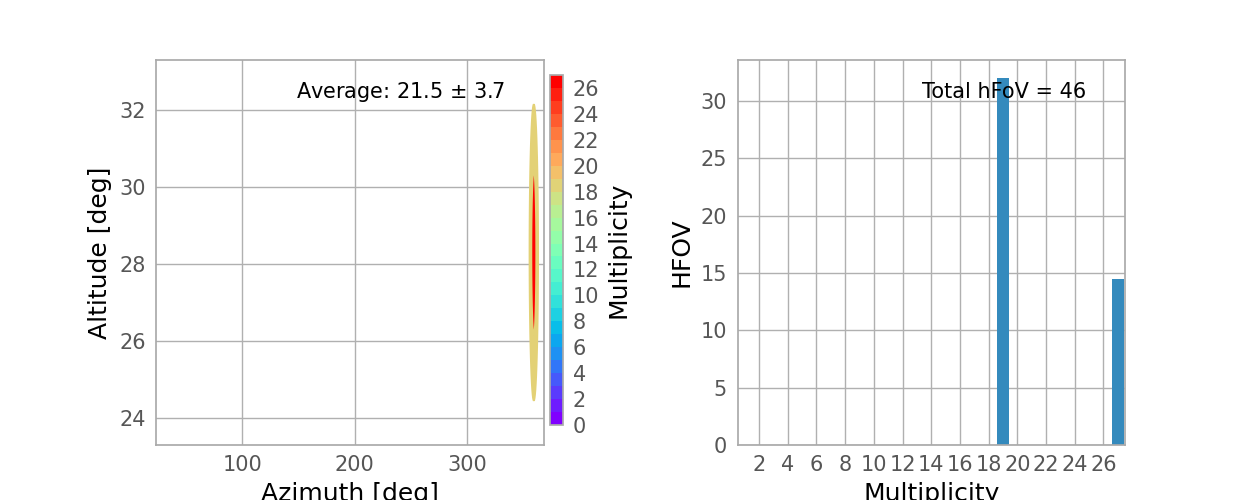

In [16]:
array.multiplicity_plot()

In [17]:
initial_pointing_dir=array.get_pointing_coord(icrs=True)

In [18]:
pointing_start_altaz=array.get_pointing_coord(icrs=False)

In [19]:
star.transform_to(cta.altaz)

<SkyCoord (AltAz: obstime=2020-02-08T04:00:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.48619534, 28.29658503)>

## Shifting the observation time and check how it change

In [20]:
array.update_frame(time = time, verbose=True)
array.update_frame(delta_t = 30*u.min, verbose=True)

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.1607829, -1718.7370058, 3051.71504125) km
Observation time :  2020-02-08T04:00:00.000
Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.1607829, -1718.7370058, 3051.71504125) km
Observation time :  2020-02-08T04:30:00.000


In [21]:
array.hFoV(m_cut=3)

<Quantity 46.49149 deg2>

In [22]:
final_pointing_dir=array.get_pointing_coord(icrs=True)
final_pointing_dir

<SkyCoord (ICRS): (ra, dec) in deg
    [(37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897)]>

In [23]:
final_pointing_dir

<SkyCoord (ICRS): (ra, dec) in deg
    [(37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897), (37.95456067, 89.26410897),
     (37.95456067, 89.26410897)]>

In [24]:
array.pointing

{'az': <Quantity 359.55967944 deg>,
 'alt': <Quantity 28.24161389 deg>,
 'ra': <Quantity 37.95456067 deg>,
 'dec': <Quantity 89.26410897 deg>}

<IPython.core.display.Javascript object>


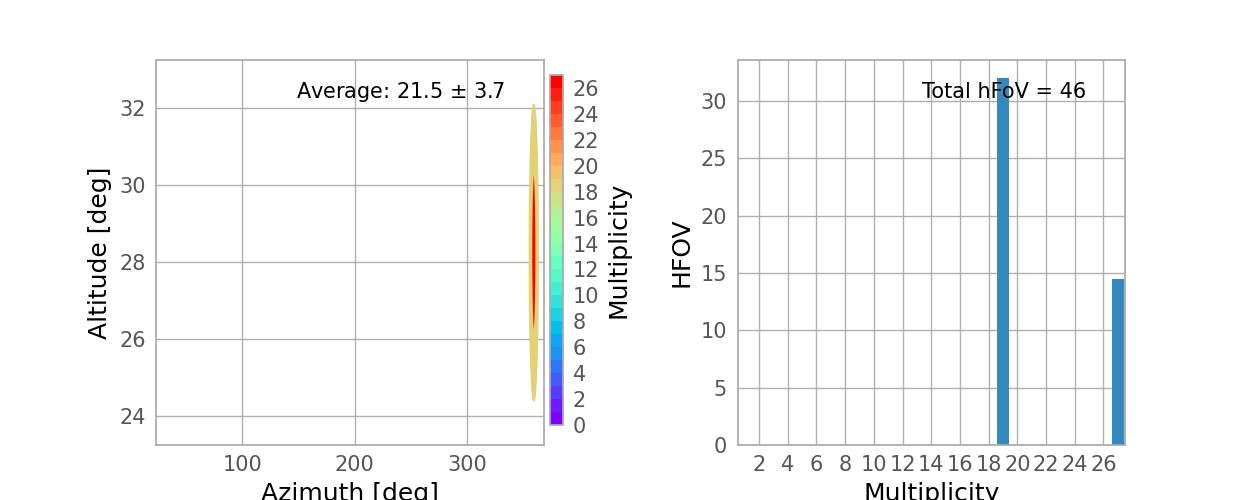

In [25]:
array.multiplicity_plot()

In [26]:
cta.altaz

<AltAz Frame (obstime=2020-02-08T04:00:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [27]:
final_pointing=initial_pointing_dir.transform_to(cta.altaz)
final_pointing

<SkyCoord (AltAz: obstime=2020-02-08T04:00:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(359.48619534, 28.29658503), (359.48619534, 28.29658503),
     (359.48619534, 28.29658503), (359.48619534, 28.29658503),
     (359.48619534, 28.29658503), (359.48619534, 28.29658503),
     (359.48619534, 28.29658503), (359.48619534, 28.29658503),
     (359.48619534, 28.29658503), (359.48619534, 28.29658503),
     (359.48619534, 28.29658503), (359.48619534, 28.29658503),
     (359.48619534, 28.29658503), (359.48619534, 28.29658503),
     (359.48619534, 28.29658503), (359.48619534, 28.29658503),
     (359.48619534, 28.29658503), (359.48619534, 28.29658503),
     (359.48619534, 28.29658503), (359.48619534, 28.29658503),
     (359.48619534, 28.29658503), (359.48619534, 28.29658503),
     (359.48619534, 28.29658503), (359.48619534, 28.29658503),
     (359.48619534, 28.296

## Get parameters (hFoV, alt, and m) as a function of time

In [28]:
array.update_frame(time = time)

fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
hFoV = [fov.value]
mAve = [m_ave]
t = [0]
alt = [array.pointing["alt"].value]
for i in range(24):
    t.append((i+1)*5)
    array.update_frame(delta_t = 5*u.min)
    fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
    hFoV.append(fov.value)
    mAve.append(m_ave)
    alt.append(array.pointing["alt"].value)

<IPython.core.display.Javascript object>


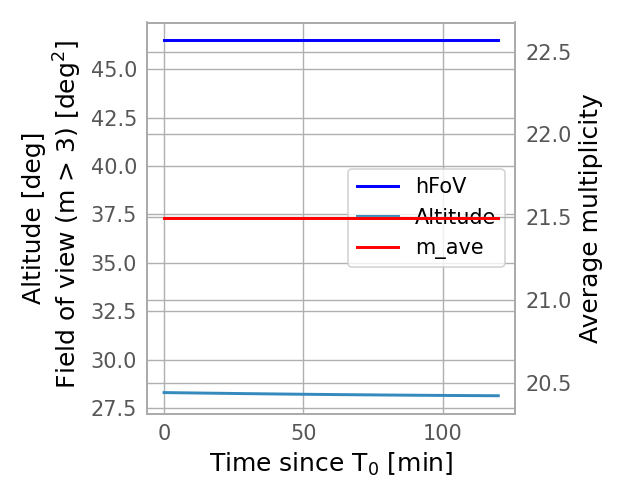

In [29]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV, color="b", label="hFoV")
p2 = ax.plot(t, alt, label="Altitude")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view (m > 3) [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p3 = ax2.plot(t, mAve, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3
ax.legend(ps, [p.get_label() for p in ps], loc=5)
plt.show(block=False)
plt.savefig(f'evolution_{name}_{time}_{div}.png')

In [30]:
star

<SkyCoord (ICRS): (ra, dec) in deg
    (37.95456067, 89.26410897)>

In [31]:
diff=[]
for i in range(len(initial_pointing_dir)):
    diff.append([initial_pointing_dir[i].ra-final_pointing_dir[i].ra,initial_pointing_dir[i].dec-final_pointing_dir[i].dec])

In [32]:
diff

[[<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.05586651e-11 deg>],
 [<Angle 1.17729826e-10 deg>, <Angle -1.